# Support Vector Machine (SVM)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
df = pd.read_csv('../../dataset/SEMI_SUPERVISED_LEARNING/breast_Cancer.csv')
df = df.dropna(axis=1, how='all')

X = df.iloc[:, 2:-1].values
y = df.iloc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Training shape: (455, 29)
Test shape: (114, 29)


In [ ]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
print(f'\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



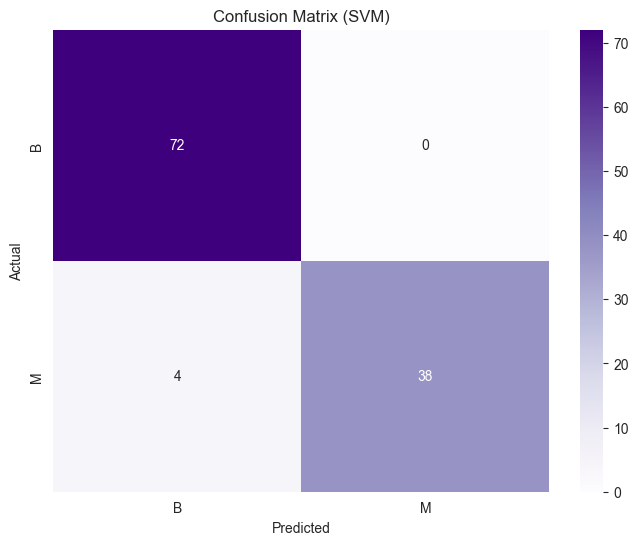

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()